In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [5]:
train.shape

(3000, 23)

In [6]:
train["release_day"] = [i.split("/")[1] for i in train.release_date]
train["release_month"] = [i.split("/")[0] for i in train.release_date]
train["release_year"] = [i.split("/")[2] for i in train.release_date]
train["release_year"] = ["20"+i if int(i) < 18 else "19"+i for i in train.release_year]

In [7]:
train["homepage_missing"] = np.array(train.homepage.isna(), dtype=int)
train["belongs_to_collection_missing"] = np.array(train.belongs_to_collection.isna(), dtype=int)

# EDA

In [9]:
all_data = pd.concat([train, test], sort=False)
import ast
for c in ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages', 
          'Keywords', 'cast', 'crew']:
all_data[c] = all_data[c].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

IndentationError: expected an indented block (<ipython-input-9-3d022c0a9df6>, line 5)

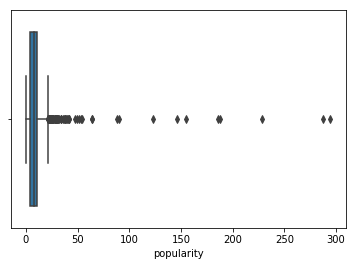

In [12]:
sns.boxplot(train['popularity'])

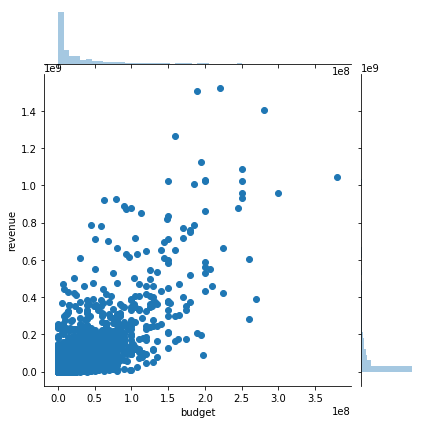

In [13]:
#For detecting outliners wrt Revenue
sns.jointplot(train.budget, train.revenue);
plt.show()

In [14]:
indexNames = train[ train['budget'] >= 200000000].index
train.drop(indexNames , inplace=True)

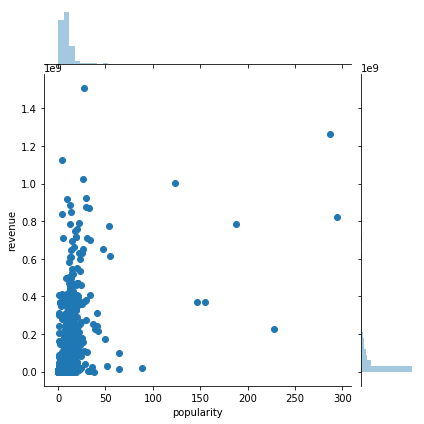

In [15]:
sns.jointplot(train.popularity, train.revenue);
plt.show()

In [16]:
indexNames = train[ train['popularity'] >= 70].index
train.drop(indexNames , inplace=True)

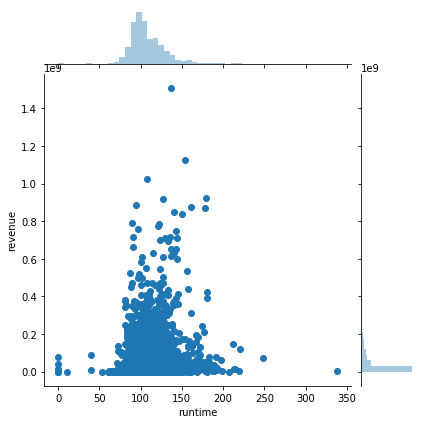

In [17]:
sns.jointplot(train.runtime, train.revenue);
plt.show()

In [18]:
#Removing outliners
indexNames = train[ train['runtime'] <= 50 ].index
train.drop(indexNames , inplace=True)
indexNames = train[ train['runtime'] >= 225 ].index
train.drop(indexNames , inplace=True)

In [19]:
#Percentage of missing values in each column
columns = train.columns
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
print(missing_value_df)

                               percent_missing
id                                    0.000000
belongs_to_collection                80.453930
budget                                0.000000
genres                                0.237127
homepage                             68.902439
imdb_id                               0.000000
original_language                     0.000000
original_title                        0.000000
overview                              0.067751
popularity                            0.000000
poster_path                           0.033875
production_companies                  5.182927
production_countries                  1.863144
release_date                          0.000000
runtime                               0.067751
spoken_languages                      0.643631
status                                0.000000
tagline                              19.715447
title                                 0.000000
Keywords                              9.112466
cast         

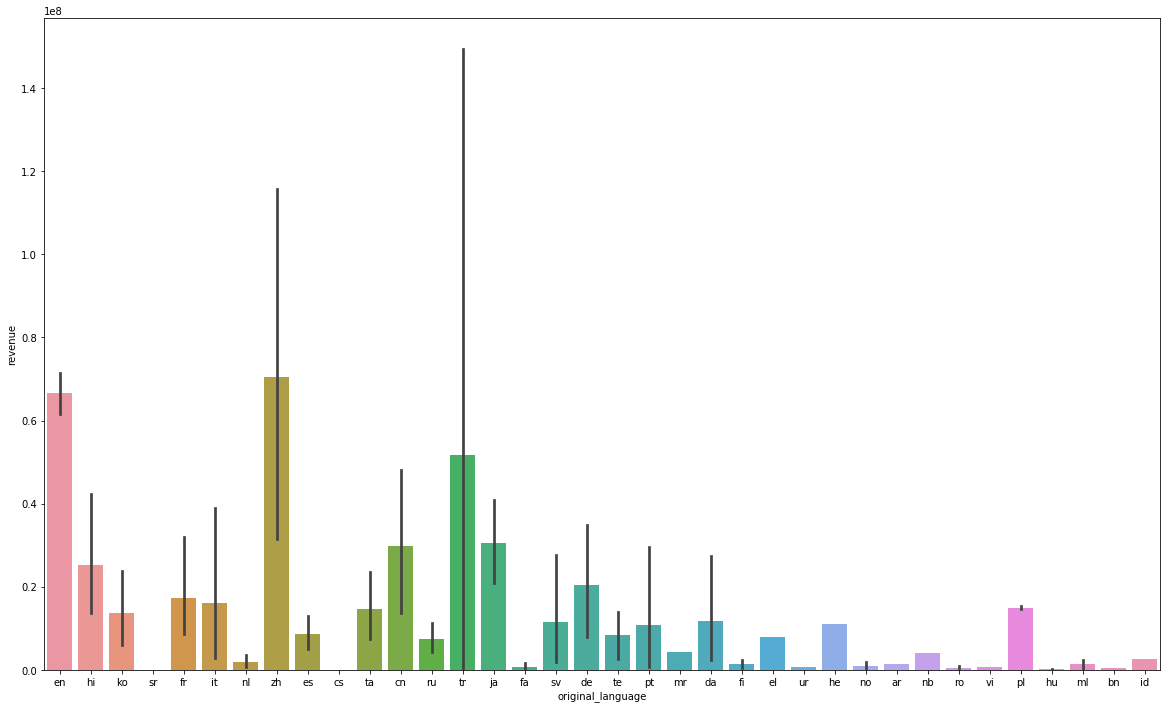

In [20]:
f, ax = plt.subplots(figsize=(20, 12))
sns.barplot(x='original_language', y='revenue', data=train);

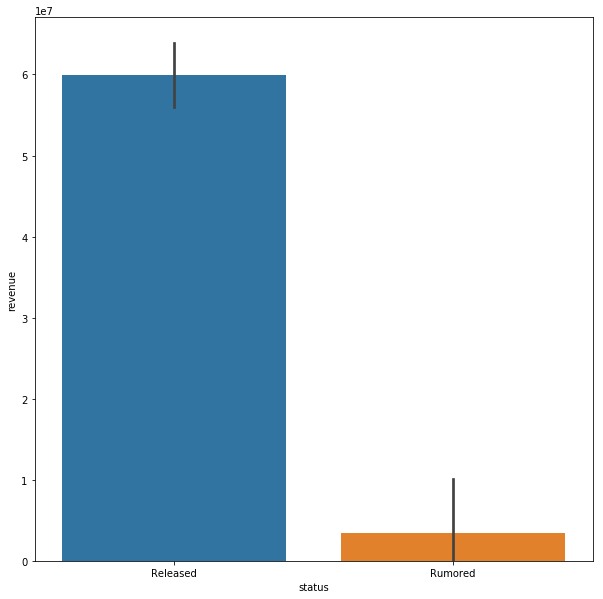

In [21]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='status', y='revenue', data=train);

# Feature Engineering

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['status']=labelencoder.fit_transform(train['status'])

In [23]:
train['original_language']=labelencoder.fit_transform(train['original_language'])

# Model Creation

In [24]:
features = ['original_language','runtime', 'budget','popularity','status']
X = train[features]
y = train.revenue
#splitting the data into training and validation to check validity of the model

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=1)

In [25]:
model  = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [18]:
#Using Xgbost for Regression
import xgboost
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6)

In [19]:
test = pd.read_csv("test.csv")
test.head()
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [20]:
cleanup_nums = {"status":     {"Released": 0, "Post Production": 1,"Rumored":2} }
test.replace(cleanup_nums, inplace=True)
test['status'] = test['status'].astype(float)
test['status'].dtypes

dtype('float64')

In [21]:
test['status'].dtypes

dtype('float64')

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test['original_language']=labelencoder.fit_transform(test['original_language'])
test['status']=labelencoder.fit_transform(test['status'])


In [23]:
y_pred=best_xgb_model.predict(test[features])
test['revenue'] = best_xgb_model.predict(test[features])
filename = 'submission.csv'
pd.DataFrame({'id': test.id, 'Revenue': test.revenue}).to_csv(filename, index=False)

In [24]:
sub= pd.read_csv("submission.csv")

In [25]:
sub.head()

,id,Revenue
0,3001,15429040.0
1,3002,2416983.2
2,3003,-10132700.0
3,3004,-6469208.5
4,3005,5110941.5
